Data loaded successfully.
Running ensemble SINDy with 10 bootstraps and 5 thresholds...

Trying threshold = 1e-10


/Users/gaoxinyue/anaconda3/envs/phi-sindy-env/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (1e-10) and eliminated all coefficients
  warnings.warn(
/Users/gaoxinyue/anaconda3/envs/phi-sindy-env/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (1e-10) and eliminated all coefficients
  warnings.warn(
/Users/gaoxinyue/anaconda3/envs/phi-sindy-env/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (1e-10) and eliminated all coefficients
  warnings.warn(
/Users/gaoxinyue/anaconda3/envs/phi-sindy-env/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (1e-10) and eliminated all coefficients
  warnings.warn(
/Users/gaoxinyue/anaconda3/envs/phi-sindy-env/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (1e-10) and eliminated

  Consensus model created for threshold = 1e-10
  Identified equations:
(x)' = 0.000
(v)' = 0.000
(state)' = 0.000
(tau)' = 0.000
  Reliability scores (fraction of bootstrap samples with non-zero coefficients):
    x': [1.  1.  0.8 0.9]
    v': [0.8 1.  0.6 0.9]
    state': [0.5 0.7 0.4 0.2]
    tau': [0.9 1.  0.7 0.8]

Trying threshold = 1e-09
  Consensus model created for threshold = 1e-09
  Identified equations:
(x)' = 0.000
(v)' = 0.000
(state)' = 0.000
(tau)' = 0.000
  Reliability scores (fraction of bootstrap samples with non-zero coefficients):
    x': [0.1 0.4 0.  0.1]
    v': [0.1 0.3 0.  0.1]
    state': [0. 0. 0. 0.]
    tau': [0.1 0.4 0.  0.1]

Trying threshold = 1e-08


/Users/gaoxinyue/anaconda3/envs/phi-sindy-env/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (1e-08) and eliminated all coefficients
  warnings.warn(
/Users/gaoxinyue/anaconda3/envs/phi-sindy-env/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (1e-08) and eliminated all coefficients
  warnings.warn(
/Users/gaoxinyue/anaconda3/envs/phi-sindy-env/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (1e-07) and eliminated all coefficients
  warnings.warn(
/Users/gaoxinyue/anaconda3/envs/phi-sindy-env/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (1e-07) and eliminated all coefficients
  warnings.warn(
/Users/gaoxinyue/anaconda3/envs/phi-sindy-env/lib/python3.8/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (1e-07) and eliminated

  Consensus model created for threshold = 1e-08
  Identified equations:
(x)' = 0.000
(v)' = 0.000
(state)' = 0.000
(tau)' = 0.000
  Reliability scores (fraction of bootstrap samples with non-zero coefficients):
    x': [0. 0. 0. 0.]
    v': [0. 0. 0. 0.]
    state': [0. 0. 0. 0.]
    tau': [0. 0. 0. 0.]

Trying threshold = 1e-07
  Consensus model created for threshold = 1e-07
  Identified equations:
(x)' = 0.000
(v)' = 0.000
(state)' = 0.000
(tau)' = 0.000
  Reliability scores (fraction of bootstrap samples with non-zero coefficients):
    x': [0. 0. 0. 0.]
    v': [0. 0. 0. 0.]
    state': [0. 0. 0. 0.]
    tau': [0. 0. 0. 0.]

Trying threshold = 1e-06
  Consensus model created for threshold = 1e-06
  Identified equations:
(x)' = 0.000
(v)' = 0.000
(state)' = 0.000
(tau)' = 0.000
  Reliability scores (fraction of bootstrap samples with non-zero coefficients):
    x': [0. 0. 0. 0.]
    v': [0. 0. 0. 0.]
    state': [0. 0. 0. 0.]
    tau': [0. 0. 0. 0.]

Best model: threshold_1e-10

Fin

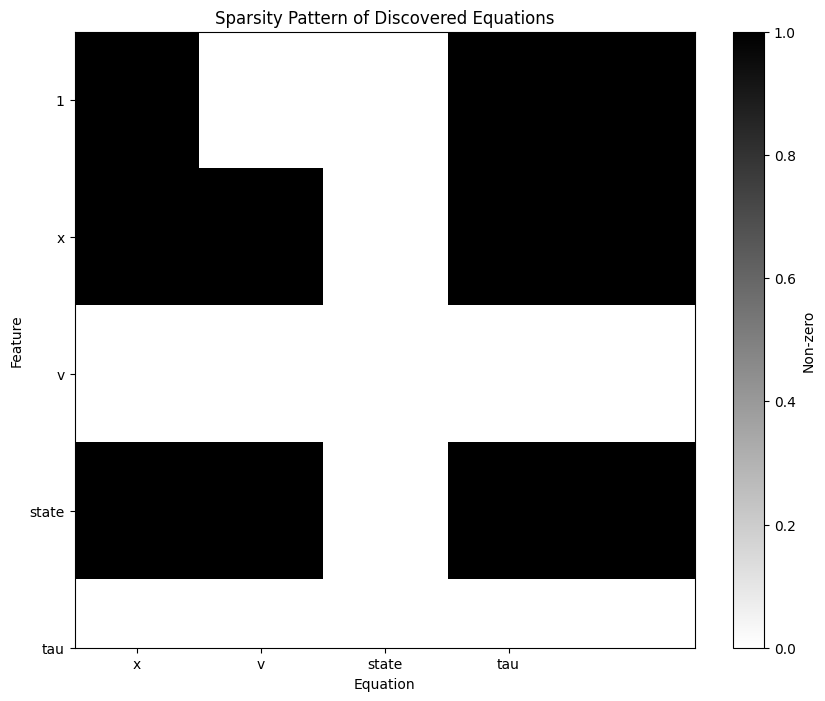

In [1]:
# Approach 4: Ensemble SINDy with Bootstrap Sampling
import numpy as np
import pysindy as ps
from pysindy.optimizers import STLSQ
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load your data
try:
    X = np.load('../data/block_slider_data.npy')
    t = np.load('../data/block_slider_time.npy')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Data files not found. Check paths.")

# Extract variables
x_data = X[:, 0]       # Position
v_data = X[:, 1]       # Velocity (slip rate)
state_data = X[:, 2]   # State variable
tau_data = X[:, 3]     # Shear stress

# Convert time to years for easier interpretation
secs_per_year = 365 * 24 * 60 * 60
t_years = t / secs_per_year

# Basic preprocessing
window_size = 21
poly_order = 2
v_smooth = savgol_filter(v_data, window_length=window_size, polyorder=poly_order)

# Create a copy with smoothed velocity
X_smooth = X.copy()
X_smooth[:, 1] = np.maximum(v_smooth, 1e-12)

# Simple scaling - log transform for velocity
X_scaled = np.zeros_like(X_smooth)
for i in range(X_smooth.shape[1]):
    if i == 1:  # Velocity
        X_scaled[:, i] = np.log10(np.maximum(X_smooth[:, i], 1e-12))
    else:
        # Min-max scaling for other variables
        X_scaled[:, i] = (X_smooth[:, i] - np.min(X_smooth[:, i])) / (np.max(X_smooth[:, i]) - np.min(X_smooth[:, i]))

# Define a function for ensemble SINDy
def ensemble_sindy(X, t, n_bootstraps=20, thresholds=[1e-6, 1e-5, 1e-4, 1e-3, 1e-2]):
    """
    Apply ensemble SINDy with bootstrap sampling and multiple thresholds.
    
    Parameters:
    -----------
    X : array
        Data array
    t : array
        Time array
    n_bootstraps : int
        Number of bootstrap samples
    thresholds : list
        List of threshold values to try
        
    Returns:
    --------
    best_model : SINDy model
        Best performing model
    all_models : dict
        Dictionary of all models
    """
    print(f"Running ensemble SINDy with {n_bootstraps} bootstraps and {len(thresholds)} thresholds...")
    
    n_samples = X.shape[0]
    dt = np.median(np.diff(t))
    
    # Store all models
    all_models = {}
    
    # Create a polynomial library
    poly_lib = ps.PolynomialLibrary(degree=1)
    
    # Try different thresholds
    for threshold in thresholds:
        print(f"\nTrying threshold = {threshold}")
        
        # Initialize coefficient array for aggregation
        coefficients = []
        
        # Create bootstrap samples
        for i in range(n_bootstraps):
            # Sample with replacement
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_bootstrap = X[indices]
            
            # Fit model on bootstrap sample
            optimizer = STLSQ(threshold=threshold)
            model = ps.SINDy(
                optimizer=optimizer,
                feature_library=poly_lib,
                feature_names=["x", "v", "state", "tau"]
            )
            
            try:
                model.fit(X_bootstrap, t=dt)
                # Store coefficients
                coefficients.append(model.coefficients())
            except Exception as e:
                print(f"  Bootstrap {i} failed: {e}")
                continue
        
        if not coefficients:
            print(f"  No successful models for threshold = {threshold}")
            continue
            
        # Convert to array
        coefficients = np.array(coefficients)
        
        # Use median of coefficients for robustness
        median_coefficients = np.median(coefficients, axis=0)
        
        # Count non-zero coefficients across bootstrap samples
        non_zero_counts = np.sum(np.abs(coefficients) > 1e-10, axis=0)
        reliability = non_zero_counts / len(coefficients)
        
        # Create a consensus model
        consensus_model = ps.SINDy(
            optimizer=STLSQ(threshold=threshold),
            feature_library=poly_lib,
            feature_names=["x", "v", "state", "tau"]
        )
        
        try:
            # Fit the model (required for initialization)
            consensus_model.fit(X, t=dt)
            
            # Override coefficients with median values
            consensus_model.optimizer.coef_ = median_coefficients
            
            # Store model
            all_models[f"threshold_{threshold}"] = {
                'model': consensus_model,
                'reliability': reliability
            }
            
            print(f"  Consensus model created for threshold = {threshold}")
            print("  Identified equations:")
            consensus_model.print()
            
            # Print reliability scores
            print("  Reliability scores (fraction of bootstrap samples with non-zero coefficients):")
            for i, var_name in enumerate(["x", "v", "state", "tau"]):
                print(f"    {var_name}': {reliability[:, i]}")
                
        except Exception as e:
            print(f"  Failed to create consensus model: {e}")
    
    # Find best model based on having non-zero coefficients
    best_model = None
    best_model_name = None
    
    for name, model_info in all_models.items():
        coeffs = model_info['model'].coefficients()
        if np.count_nonzero(coeffs) > 0:
            best_model = model_info['model']
            best_model_name = name
            break
    
    if best_model:
        print(f"\nBest model: {best_model_name}")
    else:
        print("\nNo model with non-zero coefficients found.")
        
    return best_model, all_models

# Run ensemble SINDy with very low thresholds
best_model, all_models = ensemble_sindy(
    X_scaled, 
    t,
    n_bootstraps=10,
    thresholds=[1e-10, 1e-9, 1e-8, 1e-7, 1e-6]
)

# If we found a model, visualize it
if best_model:
    # Print the equations
    print("\nFinal identified equations:")
    best_model.print()
    
    # Create a heatmap of coefficients
    coeffs = best_model.coefficients()
    plt.figure(figsize=(10, 8))
    plt.imshow(np.abs(coeffs) > 1e-10, cmap='binary', aspect='auto')
    plt.colorbar(label='Non-zero')
    plt.xlabel('Equation')
    plt.ylabel('Feature')
    plt.title('Sparsity Pattern of Discovered Equations')
    plt.xticks(range(4), ["x", "v", "state", "tau"])
    if hasattr(best_model.feature_library, 'get_feature_names'):
        feature_names = best_model.feature_library.get_feature_names(["x", "v", "state", "tau"])
        plt.yticks(range(len(feature_names)), feature_names)
    plt.savefig('../figures/ensemble_sindy_sparsity.png')
    plt.show()
else:
    print("\nNo suitable model was found. Consider different preprocessing or data collection.")